In [1]:
%load_ext autoreload
%autoreload 2

# Experiments with WMF model

In [2]:
from pathlib import Path
import numpy as np

import teaser.util as util
import teaser.evaluation as evaluation

from teaser.algorithm.baseline.wmf import WMF

## Datasets

In [3]:
## Uncomment corresponding directory.
# DATA_DIR = Path('../../data/ML20M/')
DATA_DIR = Path('../../data/Amazon Video Games/')
# DATA_DIR = Path('../../data/Publiq/')

In [4]:
# Shouldn't need to change this info
INTERACTIONS_TRAIN_PATH = DATA_DIR / 'interactions.train.csv'
INTERACTIONS_VALIN_PATH = DATA_DIR / 'interactions.valin.csv'
INTERACTIONS_VALOUT_PATH = DATA_DIR / 'interactions.valout.csv'
INTERACTIONS_TESTIN_PATH = DATA_DIR / 'interactions.testin.csv'
INTERACTIONS_TESTOUT_PATH = DATA_DIR / 'interactions.testout.csv'

METADATA_PATH = DATA_DIR / 'features.csv'

ITEM_ID = 'itemId'
USER_ID = 'userId'

## Define algorithm and hyperparameter ranges

In [28]:
ALG = WMF

L2 = [10 ** p for p in range(1, 5)]
ALPHA = [10 ** p for p in range(0, 4)]
T = 100
MAX_ITER = 20
HYPERPARAMS = {'l2': L2, 'alpha': ALPHA, 'max_iterations': MAX_ITER, 't': T}
HYPERPARAMS

{'l2': [10, 100, 1000, 10000],
 'alpha': [1, 10, 100, 1000],
 'max_iterations': 20,
 't': 100}

## Parse data

In [29]:
S, tags = util.parse_metadata(METADATA_PATH, item_id=ITEM_ID)
n, t = S.shape  # amount of items and tags
# HYPERPARAMS['t'] = t
del S, tags

X = util.parse_interactions(INTERACTIONS_TRAIN_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)

Xval_in = util.parse_interactions(INTERACTIONS_VALIN_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)
Xval_out = util.parse_interactions(INTERACTIONS_VALOUT_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)
Xtest_in = util.parse_interactions(INTERACTIONS_TESTIN_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)
Xtest_out = util.parse_interactions(INTERACTIONS_TESTOUT_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)

In [30]:
# # debug
# d_items = 1000
# S = S[:d_items,:]
# tags = tags[:d_items]
# X = X[:,:d_items]
# Xval_in = Xval_in[:,:d_items]
# Xval_out = Xval_out[:,:d_items]
# Xtest_in = Xtest_in[:,:d_items]
# Xtest_out = Xtest_out[:,:d_items]

## Perform gridsearch on validation set

In [31]:
score, best_hyperparams = evaluation.gridsearch(ALG, X, None, Xval_in, Xval_out, HYPERPARAMS)

Training model WMF with hyperparameters {'l2': 10, 'alpha': 1, 'max_iterations': 20, 't': 100}



Evaluating with 2000 users
Average Recall@20 0.139
Average Recall@100 0.293
Average nDCG@100 0.102
Training model WMF with hyperparameters {'l2': 100, 'alpha': 1, 'max_iterations': 20, 't': 100}



Evaluating with 2000 users
Average Recall@20 0.037
Average Recall@100 0.082
Average nDCG@100 0.026
Training model WMF with hyperparameters {'l2': 1000, 'alpha': 1, 'max_iterations': 20, 't': 100}



Evaluating with 2000 users
Average Recall@20 0.006
Average Recall@100 0.02
Average nDCG@100 0.005
Training model WMF with hyperparameters {'l2': 10000, 'alpha': 1, 'max_iterations': 20, 't': 100}



Evaluating with 2000 users
Average Recall@20 0.001
Average Recall@100 0.003
Average nDCG@100 0.001
Training model WMF with hyperparameters {'l2': 10, 'alpha': 10, 'max_iterations': 20, 't': 100}



Evaluating with 2000 users
Average Recall@20 0.187
Average Recall@100 0.375
Average nDCG@100 0.131
Training model WMF with hyperparameters {'l2': 100, 'alpha': 10, 'max_iterations': 20, 't': 100}



Evaluating with 2000 users
Average Recall@20 0.135
Average Recall@100 0.296
Average nDCG@100 0.102
Training model WMF with hyperparameters {'l2': 1000, 'alpha': 10, 'max_iterations': 20, 't': 100}



Evaluating with 2000 users
Average Recall@20 0.036
Average Recall@100 0.072
Average nDCG@100 0.023
Training model WMF with hyperparameters {'l2': 10000, 'alpha': 10, 'max_iterations': 20, 't': 100}



Evaluating with 2000 users
Average Recall@20 0.002
Average Recall@100 0.01
Average nDCG@100 0.002
Training model WMF with hyperparameters {'l2': 10, 'alpha': 100, 'max_iterations': 20, 't': 100}



Evaluating with 2000 users
Average Recall@20 0.187
Average Recall@100 0.396
Average nDCG@100 0.128
Training model WMF with hyperparameters {'l2': 100, 'alpha': 100, 'max_iterations': 20, 't': 100}



Evaluating with 2000 users
Average Recall@20 0.197
Average Recall@100 0.415
Average nDCG@100 0.133
Training model WMF with hyperparameters {'l2': 1000, 'alpha': 100, 'max_iterations': 20, 't': 100}



Evaluating with 2000 users
Average Recall@20 0.101
Average Recall@100 0.235
Average nDCG@100 0.076
Training model WMF with hyperparameters {'l2': 10000, 'alpha': 100, 'max_iterations': 20, 't': 100}



Evaluating with 2000 users
Average Recall@20 0.035
Average Recall@100 0.075
Average nDCG@100 0.024
Training model WMF with hyperparameters {'l2': 10, 'alpha': 1000, 'max_iterations': 20, 't': 100}



Evaluating with 2000 users
Average Recall@20 0.132
Average Recall@100 0.302
Average nDCG@100 0.094
Training model WMF with hyperparameters {'l2': 100, 'alpha': 1000, 'max_iterations': 20, 't': 100}



Evaluating with 2000 users
Average Recall@20 0.152
Average Recall@100 0.355
Average nDCG@100 0.108
Training model WMF with hyperparameters {'l2': 1000, 'alpha': 1000, 'max_iterations': 20, 't': 100}



Evaluating with 2000 users
Average Recall@20 0.181
Average Recall@100 0.397
Average nDCG@100 0.125
Training model WMF with hyperparameters {'l2': 10000, 'alpha': 1000, 'max_iterations': 20, 't': 100}



Evaluating with 2000 users
Average Recall@20 0.045
Average Recall@100 0.117
Average nDCG@100 0.035



In [32]:
f"Best score of {score} achieved with {best_hyperparams}."

"Best score of 0.13335875221661322 achieved with {'l2': 100, 'alpha': 100, 'max_iterations': 20, 't': 100}."

## Evaluate model with optimal hyperparams on test set

In [33]:
%%time
alg = ALG(**best_hyperparams)
alg.fit(X)


CPU times: user 13.9 s, sys: 15.7 s, total: 29.6 s
Wall time: 2.01 s


In [34]:
%%time
print("Performance on test set")
score = evaluation.eval(alg, Xtest_in, Xtest_out)

Performance on test set



Evaluating with 2000 users
Average Recall@20 0.209
Average Recall@100 0.418
Average nDCG@100 0.148
CPU times: user 5.54 s, sys: 116 ms, total: 5.65 s
Wall time: 1.65 s


## Plot amount of items from long tail recommended

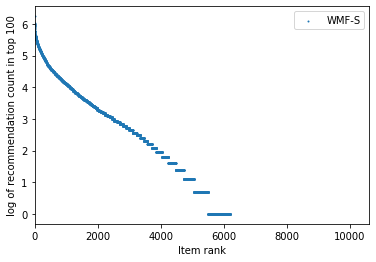

In [35]:
# evaluation.plot_long_tail(alg, Xtest_in=Xtest_in, Xtest_out=Xtest_out, labels=["EASE", "Test items"], k=100)
evaluation.plot_long_tail(alg, histories=Xtest_in, labels=["WMF-S"], k=100)